In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = "../data/"
ipt_file1 = "yelp_rvw_chn.csv"

In [3]:
df_yelp = pd.read_csv(data_path+ipt_file1)
df_yelp.head()

,Unnamed: 0,business_id,review_count,scaled.reviews,review.Rank,sum.checkin.,scaled.checkin,checkinRank,stars
0,1,_v7lMUtdd6WlgKUEBLA_VA,70,-0.424112,40.0,148,-0.436355,32.0,4.0
1,2,_VHU9KZUHRLp2Hc2JOKlYg,152,-0.355645,51.0,394,-0.373916,48.0,4.0
2,3,_Vi33ZAf0hdBn5Cu0AnQig,36,-0.452501,27.0,44,-0.462752,16.5,4.0
3,4,-2Arz8twKJmxHMS3Sv-TeA,24,-0.462521,18.0,82,-0.453107,25.0,3.5
4,5,-49WY_TEa9ZEcRk_GnuLog,31,-0.456676,24.0,164,-0.432294,35.0,3.5


In [24]:
df_yelp.tail()

,Unnamed: 0,business_id,review_count,scaled.reviews,review.Rank,sum.checkin.,scaled.checkin,checkinRank,stars
75,76,RwMLuOkImBIqqYj4SSKSPg,2448,1.561445,74.0,8261,1.622874,75.0,4.0
76,77,sxNMGQwUuaDsviR4BtuX0g,511,-0.055891,61.0,2026,0.040316,63.0,4.0
77,78,Xg5qEQiB-7L6kGJ5F4K3bQ,1463,0.739000,70.0,2320,0.114939,65.0,5.0
78,79,XQETjKH84gxDrAiz2lH7Wg,407,-0.142728,58.0,1344,-0.132788,59.0,3.5
79,80,ysv6yhVYOoH9Pf7PlMyD0g,944,0.305651,67.0,1311,-0.141164,58.0,3.5


In [12]:
rvw_80 = df_yelp["review_count"].tolist()
ckn_80 = df_yelp["sum.checkin."].tolist()

(array([63.,  7.,  2.,  5.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([3.0000e+00, 7.3880e+02, 1.4746e+03, 2.2104e+03, 2.9462e+03,
        3.6820e+03, 4.4178e+03, 5.1536e+03, 5.8894e+03, 6.6252e+03,
        7.3610e+03]),
 <a list of 10 Patch objects>)

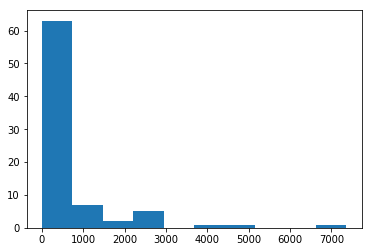

In [13]:
plt.hist(rvw_80)

(array([62.,  8.,  2.,  1.,  2.,  0.,  1.,  2.,  1.,  1.]),
 array([2.00000e+00, 1.91560e+03, 3.82920e+03, 5.74280e+03, 7.65640e+03,
        9.57000e+03, 1.14836e+04, 1.33972e+04, 1.53108e+04, 1.72244e+04,
        1.91380e+04]),
 <a list of 10 Patch objects>)

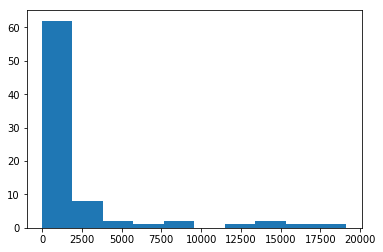

In [14]:
plt.hist(ckn_80)

(array([ 2.,  0.,  0.,  0., 16.,  0.,  0.,  0., 27.,  0.,  0.,  0., 29.,
         0.,  0.,  0.,  5.,  0.,  0.,  1.]),
 array([2.5  , 2.625, 2.75 , 2.875, 3.   , 3.125, 3.25 , 3.375, 3.5  ,
        3.625, 3.75 , 3.875, 4.   , 4.125, 4.25 , 4.375, 4.5  , 4.625,
        4.75 , 4.875, 5.   ]),
 <a list of 20 Patch objects>)

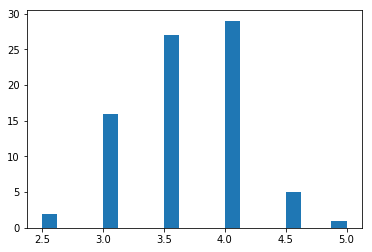

In [15]:
rating_80 = df_yelp["stars"].tolist()
plt.hist(rating_80, 20)

{'whiskers': [<matplotlib.lines.Line2D at 0x11aa258d0>,
 'caps': [<matplotlib.lines.Line2D at 0x11aa2e1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11aa25780>],
 'medians': [<matplotlib.lines.Line2D at 0x11aa2ea20>],
 'fliers': [<matplotlib.lines.Line2D at 0x11aa38278>],
 'means': [<matplotlib.lines.Line2D at 0x11aa2ee48>]}

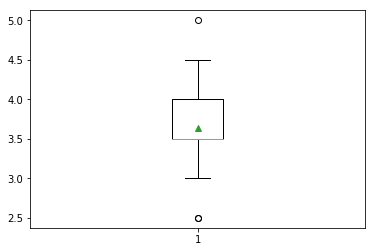

In [23]:
plt.boxplot(rating_80, showmeans=True)

In [18]:
q1 = np.percentile(rvw_80, 25)
q3 = np.percentile(rvw_80, 75)
iqr = q3 - q1
bd_l = q1 - 1.5*(iqr)
bd_u = q3 + 1.5*(iqr)

bd_rvw = []
for i in rvw_80:
    if i < bd_u:
        bd_rvw.append(i)
len(bd_rvw)

68

In [19]:
q1 = np.percentile(ckn_80, 25)
q3 = np.percentile(ckn_80, 75)
iqr = q3 - q1
bd_l = q1 - 1.5*(iqr)
bd_u = q3 + 1.5*(iqr)

bd_ckn = []
for i in ckn_80:
    if i < bd_u:
        bd_ckn.append(i)
len(bd_ckn)

70

In [20]:
mean_rvw = np.mean(bd_rvw)
std_rvw  = np.std(bd_rvw)
plt_rvw = (bd_rvw - mean_rvw)/std_rvw

In [21]:
mean_ckn = np.mean(bd_ckn)
std_ckn  = np.std(bd_ckn)
plt_ckn = (bd_ckn - mean_ckn)/std_ckn

{'whiskers': [<matplotlib.lines.Line2D at 0x11a9b7c18>,
 'caps': [<matplotlib.lines.Line2D at 0x11a9c54e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11a9b7ac8>,
 'medians': [<matplotlib.lines.Line2D at 0x11a9c5d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a9ca588>,
 'means': [<matplotlib.lines.Line2D at 0x11a9ca198>,
  <matplotlib.lines.Line2D at 0x11a9dc390>]}

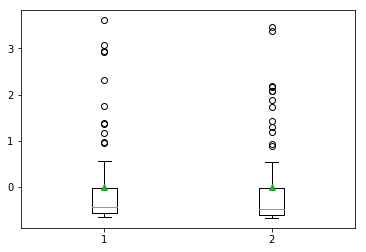

In [22]:
plt.boxplot([plt_rvw, plt_ckn], showmeans=True)